In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
import seaborn as sns
from matplotlib.colors import ListedColormap
import sklearn
from sklearn.datasets import load_boston
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
#Loading and Processing data into DF
boston = load_boston()
df = pd.DataFrame(boston.data)
target = pd.DataFrame(boston.target)
df.columns = boston.feature_names

In [3]:
#Adding Target Column
target.columns = ['PRICE']
df = pd.concat((df,target), axis =1)
#Correlation Matrix
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


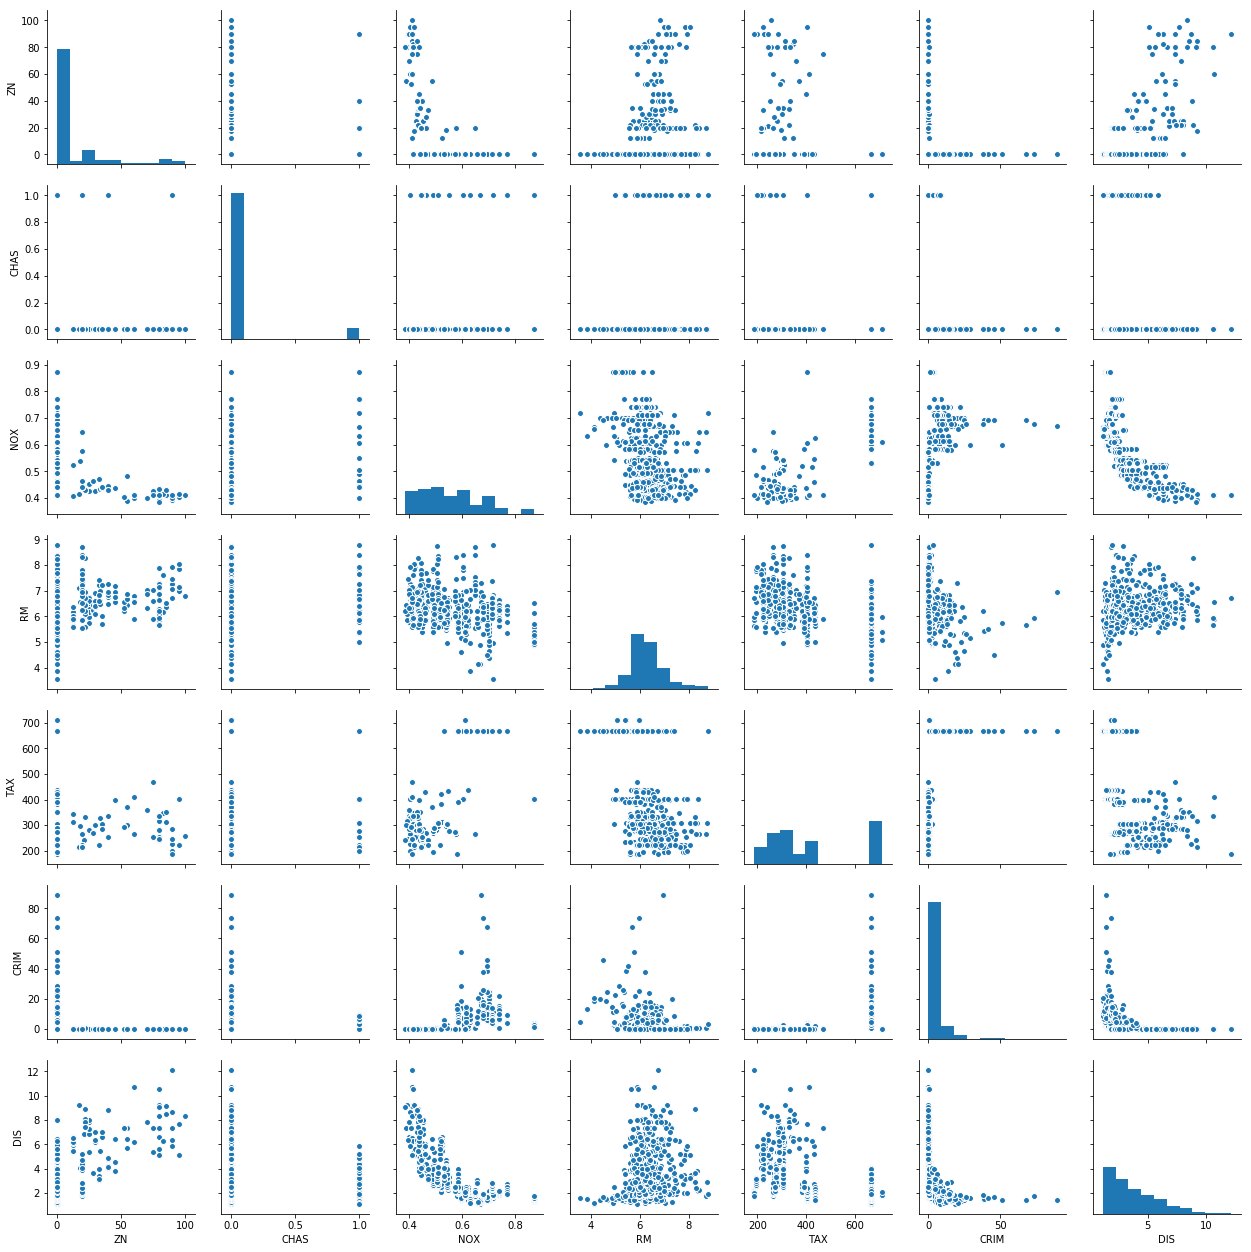

In [4]:
#Plotting
sns.pairplot(df, x_vars=['ZN','CHAS','NOX','RM','TAX','CRIM','DIS'], y_vars=['ZN','CHAS','NOX','RM','TAX','CRIM','DIS'])

In [5]:
# Engineering the features
df['E1'] = df['CHAS']*2
df['E2'] = df['ZN']*2
df['E3'] = df['RM']*2
df['E4'] = df['INDUS']*2
df['E5'] = df['CRIM']*2
df['E6'] = df['LSTAT']*2
df['E7'] = df['E6']*df['E4']
df['E8'] = df['E3']*df['E4']
df['E9'] = df['E5']*df['E4']
df['E10'] = df['E1']*df['E4']

#Adding 10 Irrelevant features
cancer =  pd.DataFrame(sklearn.datasets.load_breast_cancer().data)
df['B1'] = cancer.loc[:506,0]
df['B2'] = cancer.loc[:506,1]
df['B3'] = cancer.loc[:506,2]
df['B4'] = cancer.loc[:506,3]
df['B5'] = cancer.loc[:506,4]
df['B6'] = cancer.loc[:506,5]
df['B7'] = cancer.loc[:506,6]
df['B8'] = cancer.loc[:506,7]
df['B9'] = cancer.loc[:506,8]
df['B10'] = cancer.loc[:506,9]

In [6]:
print(df.describe(include = 'all').loc[['mean','min','max','count']])

             CRIM          ZN       INDUS       CHAS         NOX          RM  \
mean     3.593761   11.363636   11.136779    0.06917    0.554695    6.284634   
min      0.006320    0.000000    0.460000    0.00000    0.385000    3.561000   
max     88.976200  100.000000   27.740000    1.00000    0.871000    8.780000   
count  506.000000  506.000000  506.000000  506.00000  506.000000  506.000000   

              AGE         DIS         RAD         TAX     ...              B1  \
mean    68.574901    3.795043    9.549407  408.237154     ...       14.220429   
min      2.900000    1.129600    1.000000  187.000000     ...        6.981000   
max    100.000000   12.126500   24.000000  711.000000     ...       28.110000   
count  506.000000  506.000000  506.000000  506.000000     ...      506.000000   

               B2          B3           B4         B5          B6          B7  \
mean    19.064328   92.595514   662.820553    0.09625    0.104661    0.090171   
min      9.710000   43.790000  

In [7]:
#Add correlation between price and each variable. 
correlation_df = pd.DataFrame(columns = ['Column A','Column B','Correlation'])
for i in df.columns:
    correlation = df['PRICE'].corr(df[i])
    to_append = pd.DataFrame({'Column A': ['PRICE'],'Column B': [i],'Correlation': [correlation]})
    correlation_df = correlation_df.append(to_append,ignore_index=True)

correlation_df

,Column A,Column B,Correlation
0,PRICE,CRIM,-0.385832
1,PRICE,ZN,0.360445
2,PRICE,INDUS,-0.483725
3,PRICE,CHAS,0.175260
4,PRICE,NOX,-0.427321
5,PRICE,RM,0.695360
6,PRICE,AGE,-0.376955
7,PRICE,DIS,0.249929
8,PRICE,RAD,-0.381626
9,PRICE,TAX,-0.468536


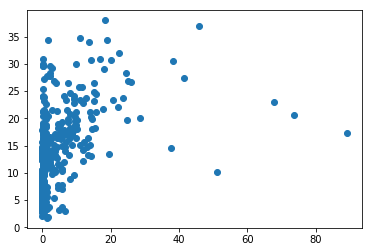

In [8]:
#Scatter Plots
plt.scatter(df['CRIM'],df['LSTAT'])

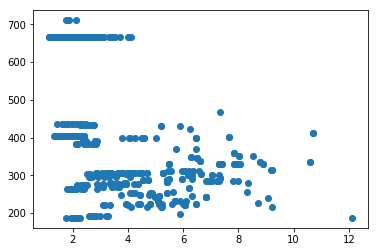

In [9]:
plt.scatter(df['DIS'],df['TAX'])

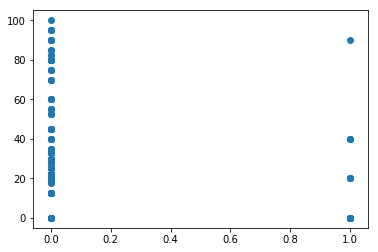

In [10]:
plt.scatter(df['CHAS'],df['ZN'])

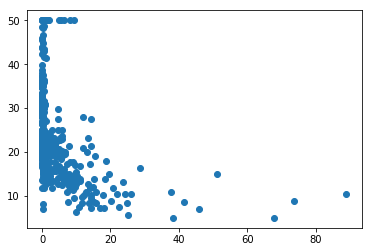

In [11]:
plt.scatter(df['CRIM'],df['PRICE'])

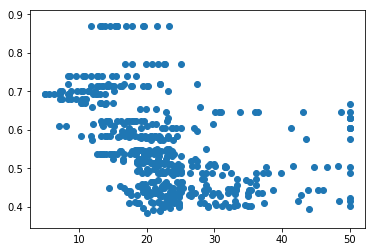

In [12]:
plt.scatter(df['PRICE'],df['NOX'])

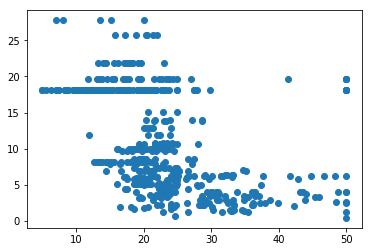

In [13]:
plt.scatter(df['PRICE'],df['INDUS'])
#End of Active Data exploration

### Warmup

In [14]:
#Loss Function
def lossFunc(model, test_data,test_label):
    test_data = np.concatenate((np.ones((test_data.shape[0],1)), test_data), axis=1)
    test_data = np.matrix(test_data)
    test_label = np.matrix(test_label)
    beta = np.matrix(model.coef_)
    beta = beta.T
    coeff = np.concatenate((np.matrix(model.intercept_),beta),axis=0)
    temp = (test_data.dot(coeff))
    first_comp = test_label - temp
    lf = (first_comp.T) @ (first_comp)
    return np.mean(lf)

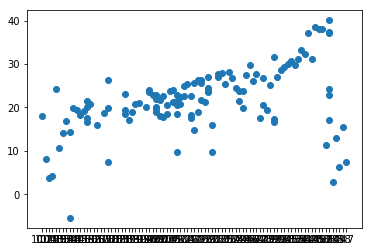

In [15]:
# Selecting 2 Features with highest correlation! 
X= df[['RM','LSTAT']]
y = df[['PRICE']]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
mlog = LinearRegression().fit(X_train,y_train)
yhat = mlog.predict(X_test)
plt.scatter(y_test, yhat)

In [16]:
lossFunc(mlog,X_test,y_test)

4469.421699592223

In [17]:
mse = sklearn.metrics.mean_squared_error(yhat, y_test)
mse

35.19229684718286

In [18]:
# Kfold Function
def kFolds(data,target,folds= 10):
    mse =[]
    for train,test in KFold(n_splits=folds).split(data):
        data_train, data_test = data.iloc[train], data.iloc[test]
        target_train, target_test = target.iloc[train], target.iloc[test]
        model = LinearRegression()
        model.fit(data_train,target_train)
        mse.append(lossFunc(model,data_test,target_test))
    return np.mean(mse)

kFolds(X,y)


1934.9279629832035

In [20]:
score = cross_validate(LinearRegression(), X,y,scoring=lossFunc, cv=10)
np.mean(score['test_score'])

1934.9279629832035

In [25]:
# 10 features
F10 = df[['LSTAT','TAX','RM','CRIM','DIS','ZN','E2','E8','B5','B9']]
kFolds(F10,y)

1781.152122793092

In [28]:
S10 = cross_validate(LinearRegression(), F10,y,scoring=lossFunc, cv=10)
np.mean(S10['test_score'])

1781.152122793092

In [29]:
Full = df[df.columns.difference(['PRICE'])]
kFolds(Full,y)

1450.145913005562

In [31]:
scoreFull = cross_validate(LinearRegression(), Full,y,scoring=lossFunc, cv=10)
np.mean(scoreFull['test_score'])
#Turns out the Full Model is the Best! 

1450.145913005562

### Find the best models

In [40]:
import random
mse = []
for i in range(1,11):
    for i in range(1,34):
        features = random.sample(list(Full.columns),i) 
        mse.append(np.mean(cross_validate(LinearRegression(), Full,y,scoring=lossFunc, cv=10)['test_score']))
mse = {}
for i in Full.columns:
    mse[i] = np.mean(cross_validate(LinearRegression(), df[[i]],y,scoring=lossFunc, cv=10)['test_score'])
min(mse.items(), key=lambda x: x[1])

('E6', 2118.41131834673)

In [43]:
features = []
cols = list(Full.columns)
bic=[]
aic=[]
r=[]

In [49]:
while len(features)!=33:  
    mse={}
    for i in cols:
        mse[i]=np.mean(cross_validate(LinearRegression(), df[[*features,i]],y,scoring=lossFunc, cv=10)['test_score'])
    result = min(mse.items(), key=lambda x: x[1])[0]
    features.append(result) 
    model = sm.ols(formula='PRICE ~ '+' + '.join(features), data=df).fit() 
    bic.append(model.bic) 
    aic.append(model.aic) 
    r.append(model.rsquared_adj) 
    cols.remove(result) 
#Best Models
best_model = features[:(np.argmin(aic) + 1)]
best_model_bic = features[:(np.argmin(bic) + 1)] 
XBM = df[best_model]

print(np.argmin(aic))
print(np.argmin(bic)) 
print(best_model)
print(best_model)
print(np.mean(cross_validate(LinearRegression(), XBM, y,scoring=lossFunc, cv=10)['test_score']))

31
8
['E6', 'PTRATIO', 'RM', 'DIS', 'E8', 'E4', 'E7', 'E10', 'CRIM', 'B10', 'B8', 'E9', 'E6', 'INDUS', 'E3', 'LSTAT', 'E5', 'B9', 'ZN', 'E2', 'B2', 'B6', 'NOX', 'B5', 'B3', 'B1', 'B4', 'E1', 'CHAS', 'B7', 'AGE', 'RAD']
['E6', 'PTRATIO', 'RM', 'DIS', 'E8', 'E4', 'E7', 'E10', 'CRIM', 'B10', 'B8', 'E9', 'E6', 'INDUS', 'E3', 'LSTAT', 'E5', 'B9', 'ZN', 'E2', 'B2', 'B6', 'NOX', 'B5', 'B3', 'B1', 'B4', 'E1', 'CHAS', 'B7', 'AGE', 'RAD']
1449.9301326584466


In [50]:
#The mse of the best model based on AIC scores ic 1449.93

### Principal Components

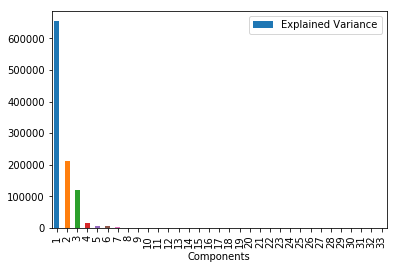

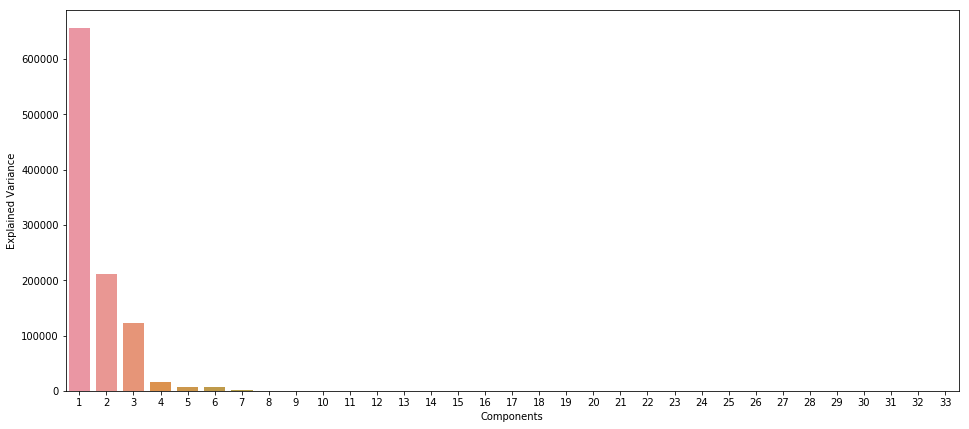

In [56]:
pca = PCA(n_components=33)
pca.fit(Full)
exp_var = list(pca.explained_variance_)
comp = range(1,34)
variance = pd.DataFrame({'Explained Variance': exp_var, 'Components': comp})
variance.plot.bar(x='Components', y = 'Explained Variance')
plt.figure(figsize=(16,7))
sns.barplot(x="Components", y="Explained Variance", data=variance)


,Components,Explained Variance,ProportionalExpVar,CumulativeExpVar
0,1,655397.367792,0.641843,0.641843
1,2,211005.751007,0.206642,0.848485
2,3,121950.754566,0.119429,0.967914
3,4,16572.453751,0.016230,0.984144
4,5,7577.028196,0.007420,0.991564
5,6,6049.060893,0.005924,0.997488
6,7,1936.281454,0.001896,0.999384


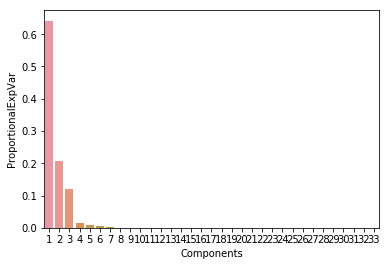

In [58]:
# Proportional Variance 
expvar_prop = list(pca.explained_variance_ratio_)
variance['ProportionalExpVar'] = expvar_prop
sns.barplot(variance.Components, variance['ProportionalExpVar'])
expvar_cum = list(pca.explained_variance_ratio_.cumsum())
variance['CumulativeExpVar'] = expvar_cum
variance.head(7)

In [64]:
cols = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22','pc23','pc24','pc25','pc26','pc27','pc28','pc29','pc30','pc31','pc32','pc33']
rotdf = pd.DataFrame(pca.fit_transform(Full),columns=cols)
components = list(rotdf.columns)
mse_list=[]
for i in range(1,34):
    mse = np.mean(cross_validate(LinearRegression(), rotdf[components[:i]],y,scoring=lossFunc, cv=10)['test_score'])
    mse_list.append(mse)
print(np.mean(mse_list))

1915.8821036323325


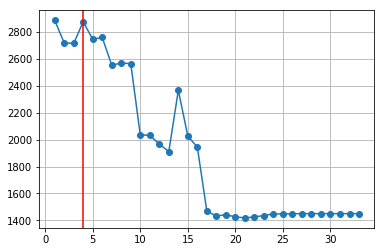

20


In [67]:
plt.plot(range(1,34),mse_list,marker='o')
plt.grid(b=True)
plt.axvline(x=4,c='r')
plt.show()
print(np.argmin(mse_list))

### PCA on normalized data

In [70]:
def normalization(df):
    return (df - np.mean(df))/ np.std(df)
normFull = normalization(Full)

In [73]:
cols_norm = ['pc_norm1','pc_norm2','pc_norm3','pc_norm4','pc_norm5','pc_norm6','pc_norm7','pc_norm8','pc_norm9','pc_norm10','pc_norm11','pc_norm12','pc_norm13','pc_norm14','pc_norm15','pc_norm16','pc_norm17','pc_norm18','pc_norm19','pc_norm20','pc_norm21','pc_norm22','pc_norm23','pc_norm24','pc_norm25','pc_norm26','pc_norm27','pc_norm28','pc_norm29','pc_norm30','pc_norm31','pc_norm32','pc_norm33']
rot_normFull = pd.DataFrame(pca.fit_transform(normFull),columns=cols_norm)
components_norm = list(rot_normFull.columns)
mse_listnorm=[]
for i in range(1,34):
    mse = np.mean(cross_validate(LinearRegression(), rot_normFull[components_norm[:i]],y,scoring=lossFunc, cv=10)['test_score'])
    mse_listnorm.append(mse)
print(np.mean(mse_listnorm))

1763.5262634232051


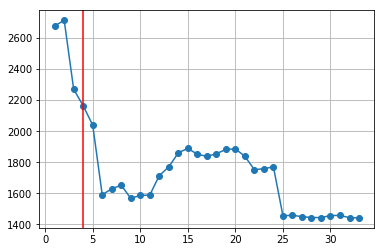

In [74]:
plt.plot(range(1,34),mse_listnorm,marker='o')
plt.grid(b=True)
plt.axvline(x=4,c='r')
plt.show()

In [ ]:
#Comments:
# PCA on the normalized data is the most precise one.
# Most compact solution is the PCA on Raw data.